<a href="https://colab.research.google.com/github/joanby/matematicas-ml/blob/master/5_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad y teoría de la información

Esta clase, *Probabilidad y Teoría de la Información*, introduce los campos matemáticos que nos permiten cuantificar la incertidumbre, así como hacer predicciones a pesar de la incertidumbre. Estos campos son esenciales porque los algoritmos de aprendizaje automático se entrenan con datos imperfectos y se despliegan en escenarios ruidosos del mundo real con los que no se han encontrado antes.

A través de la exposición mesurada de la teoría junto con ejemplos interactivos, desarrollará una comprensión práctica de las variables, las distribuciones de probabilidad, las métricas para evaluar las distribuciones y los modelos gráficos. También aprenderá a utilizar la teoría de la información para medir cuánta señal significativa hay en unos datos dados. El contenido cubierto en esta clase es a su vez fundamental para varias otras clases de la serie *Fundamentos del Aprendizaje Automático*, especialmente *Introducción a la Estadística* y *Optimización*.


En el transcurso del estudio de este tema, vamos a:

* Desarrollar una comprensión de lo que está pasando bajo el capó de los modelos estadísticos predictivos y algoritmos de aprendizaje automático, incluidos los utilizados para el aprendizaje profundo.
* Comprender el tipo de variable y la distribución de probabilidad adecuados para representar una determinada clase de datos, así como las técnicas estándar para evaluar las relaciones entre distribuciones.
* Aplicar la teoría de la información para cuantificar la proporción de señal valiosa que está presente entre el ruido de una distribución de probabilidad dada.


**Tenga en cuenta que este cuaderno Jupyter no está diseñado para funcionar por sí solo. Es el código que acompaña a una clase o a los vídeos de la serie [Fundamentos Matemáticos de Machine Learning](https://github.com/joanby/matematicas-ml) de Juan Gabriel Gomila, que ofrecen detalles sobre lo siguiente:**

*Segmento 1: Introducción a la probabilidad*
* Qué es la teoría de la probabilidad
* Breve historia: Frecuentistas vs Bayesianos
* Aplicaciones de la probabilidad al aprendizaje automático
* Variables Aleatorias
* Variables Discretas vs Continuas
* Masa de Probabilidad y Funciones de Densidad de Probabilidad
* Valor esperado
* Medidas de Tendencia Central: Media, Mediana y Moda
* Cuantiles: Cuartiles, Deciles y Percentiles
* Diagrama de caja y bigotes
* Medidas de dispersión: Varianza, desviación típica y error típico
* Medidas de relación: Covarianza y correlación
* Probabilidades marginales y condicionales
* Independencia e independencia condicional

*Segmento 2: Distribuciones en el aprendizaje automático*
* Uniforme
* Gaussiana: Normal y Normal Estándar
* Teorema del Límite Central
* Log-Normal
* Exponencial y Laplace
* Binomial y Multinomial
* Poisson
* Distribuciones de mezcla
* Preprocesamiento de datos para la entrada de modelos

*Segmento 3: Teoría de la Información*
* Qué es la Teoría de la Información
* Autoinformación
* Nats, Bits y Shannons
* Shannon y la entropía diferencial
* Divergencia de Kullback-Leibler
* Entropía cruzada


## Segmento 1: Introducción a la Probabilidad

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Qué es la teoría de la Probabilidad

#### Eventos y Espacio Muestral

Supongamos que tenemos una moneda justa, que tiene las mismas probabilidades de salir cara (C) o cruz (X).

En casos como éste, en el que los dos resultados son igual de probables, podemos utilizar la teoría de la probabilidad para expresar la probabilidad de un **evento** concreto comparándolo con el **espacio muestral** (el conjunto de todos los resultados posibles; puede denotarse como $\Omega$):

$$ P(\text{evento}) = \frac{\text{# de ocurrencias del evento}}{\text{# de ocurrencias en }\Omega} $$

Si sólo lanzamos la moneda una vez, entonces sólo hay dos resultados posibles en el espacio muestral $\Omega$: será C o X (utilizando la notación de conjuntos, podríamos escribir esto como $\Omega$ = {C, X}).

Entonces: $$ P(C) = \frac{1}{2} = 0.5 $$

Igualmente: $$ P(X) = \frac{1}{2} = 0.5 $$

Como ejemplo aparte, considere la posibilidad de extraer una sola carta de una baraja estándar de 52 naipes. En este caso, el número de resultados posibles en el espacio muestral $\Omega$ es 52.

Sólo hay un as de picas en la baraja, así que la probabilidad de sacarlo es: $$ P(\text{as de picas}) = \frac{1}{52} \approx 0,019 $$

En cambio, hay cuatro ases, por lo que la probabilidad de sacar un as es: $$ P(\text{as}) = \frac{4}{52} \approx 0,077 $$

Algunos ejemplos adicionales:
$$ P(\text{picas}) = \frac{13}{52} = 0.25 $$
$$ P(\text{as OR picas}) = \frac{16}{52} \approx 0.307 $$
$$ P(\text{carta}) = \frac{52}{52} = 1 $$
$$ P(\text{nabo}) = \frac{0}{52} = 0 $$

#### Múltiples observaciones independientes

Volvamos al lanzamiento de la moneda para ilustrar situaciones en las que tenemos un suceso que consta de múltiples observaciones independientes. Por ejemplo, la probabilidad de lanzar dos caras consecutivas es: $$ P(\text{CC}) = \frac{1}{4} = 0,25 $$ ...porque hay un suceso CC en el conjunto muestral de cuatro sucesos posibles ($\Omega$ = {CC, CX, XC, XX}).

Del mismo modo, la probabilidad de sacar *tres* caras consecutivas es: $$ P(\text{CCC}) = \frac{1}{8} = 0,125 $$ ...porque hay un suceso CCC en el conjunto muestral de ocho sucesos posibles ($\Omega$ = {CCC, CCX, CXC, XCC, CXX, XCX, XXC, XXX}).

Como ejemplos finales, la probabilidad de sacar exactamente dos caras en tres lanzamientos es $ P = \frac{3}{8} = 0,375 $ mientras que la probabilidad de sacar al menos dos caras en tres lanzamientos es $ P = \frac{4}{8} = 0,5 $.

#### Probabilidades combinadas

Para combinar probabilidades, podemos multiplicarlas. Así, la probabilidad de sacar cinco caras consecutivas, por ejemplo, es el producto de las probabilidades que ya hemos calculado:
$$ P(\text{CCCCC}) = P(\text{CC}) \times P(\text{CCC}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$

#### Combinatoria

La *combinatoria* es un campo de las matemáticas dedicado al recuento que puede ser útil para estudiar las probabilidades. Podemos utilizar **factoriales** (por ejemplo, $4! = 4 \times 3 \times 2 \times 1 = 24$), que ocupan un lugar destacado en combinatoria, para calcular probabilidades en lugar de determinar minuciosamente todos los miembros del espacio muestral $\Omega$ y contar subconjuntos dentro de $\Omega$.

Más concretamente, podemos calcular el número de resultados de un suceso utilizando la ecuación del «número de combinaciones»: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

El lado izquierdo de la ecuación se lee «$n$ elige $k$» y se entiende más rápidamente mediante un ejemplo: Si tenemos tres monedas, $n = 3$, y si estamos interesados en el número de formas de obtener dos caras (o dos cruces), $k = 2$. Leeríamos esto como «3 eligen 2» y lo calcularíamos como:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

Esto nos proporciona el numerador para la ecuación de probabilidad de suceso de arriba:  $$ P(\text{event}) = \frac{\text{# de resultados del evento}}{\text{# de resultados en }\Omega} $$

En el caso de lanzar una moneda (o cualquier proceso binario con resultados igualmente probables), el denominador se puede calcular con $2^n$ (donde $n$ es de nuevo el número de lanzamientos de la moneda), así: $$ \frac{\text{# de resultados del evento}}{\text{# de resultados en }\Omega} = \frac{3}{2^n} = \frac{3}{2^3} = \frac{3}{8} = 0.375 $$

**Ejercicios**:

1. ¿Cuál es la probabilidad de sacar el as de picas dos veces seguidas? (Suponga que cualquier carta sacada en la primera extracción se vuelve a poner en la baraja antes de la segunda extracción).
2. Se saca una carta de la baraja. Después de volver a colocar la carta extraída en el mazo y barajar bien, ¿cuál es la probabilidad de volver a sacar la misma carta?
3. Utiliza $n \choose k$ para calcular la probabilidad de sacar tres caras en cinco lanzamientos de moneda.
4. Crea un método en Python que resuelva el ejercicio 3 e incorpore la fórmula $\frac{n!}{k!(n - k)!}$. Con el método en la mano, calcular la probabilidad de - en cinco lanzamientos - tirar cada uno de cero, uno, dos, tres, cuatro y cinco caras.

**Alerta de spoiler**: Las soluciones están más abajo, así que desplázate con cuidado...

**Soluciones**:

1. $$ P(\text{as de picas}) \times P(\text{as de picas}) = \left(\frac{1}{52}\right)^2 = \frac{1}{2704} = 0.00037 = 0.037\% $$

2. $$ P(\text{cualquier carta}) = \frac{52}{52} = 1 $$
$$ P(\text{misma carta en la primera extracción}) = \frac{1}{52} \approx 0.019 $$
$$ P(\text{cualquier carta})P(\text{misma carta en la primera extracción}) = (1)(\frac{1}{52}) = \frac{1}{52} \approx 0.019$$

3. $$ {n \choose k} = {5 \choose 3} = \frac{5!}{3!(5 - 3)!} = \frac{5!}{(3!)(2!)} = \frac{5 \times 4 \times 3 \times 2 \times 1}{(3 \times 2 \times 1)(2 \times 1)} = \frac{120}{(6)(2)} = \frac{120}{12} = 10 $$

$$P = \frac{10}{2^n} = \frac{10}{2^5} = \frac{10}{32} = 0.3125 $$

In [2]:
from math import factorial

In [3]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [4]:
coinflip_prob(5, 3)

0.3125

In [5]:
[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

#### La Ley de los Grandes Números

La **ley de los grandes números** establece que cuantos más experimentos realicemos, más nos acercaremos a la probabilidad esperada.

Vamos a ejecutar un código para examinar esto en la práctica. Para empezar, vamos a crear un vector de exponencialmente creciente $n$ del número de lanzamientos de moneda por experimento:

In [6]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

In [7]:
np.random.seed(42) # para poder reproducir el experimento aleatorio

Discutiremos el método `binomial()` con más detalle en el *Segmento 2*. Por ahora basta pensar en sus dos argumentos como *número de lanzamientos de moneda en el experimento* y *probabilidad de cara*, mientras que devuelve el número de lanzamientos que salen cara en el experimento.

In [8]:
np.random.binomial(1, 0.5)

0

In [9]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [10]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

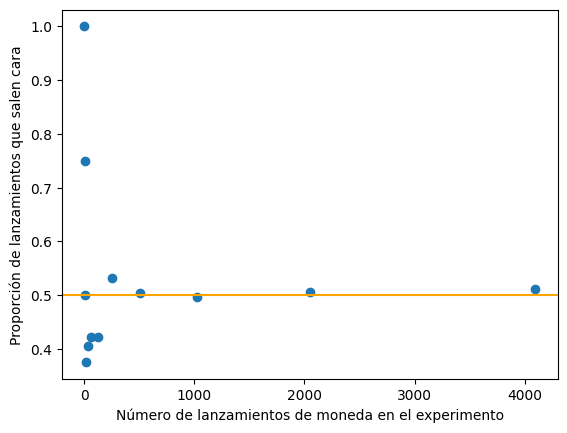

In [11]:
fig, ax = plt.subplots()
plt.xlabel('Número de lanzamientos de moneda en el experimento')
plt.ylabel('Proporción de lanzamientos que salen cara')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

In [12]:
np.random.binomial(100000, 0.5)

50007

In [13]:
49963/100000

0.49963

En este punto es importante abordar la **falacia del jugador**. Es un error común creer que la ley de los grandes números dicta que si, por ejemplo, se han lanzado cinco caras seguidas, la probabilidad de que salga cruz es mayor en la sexta tirada. De hecho, la teoría de la probabilidad sostiene que cada lanzamiento de una moneda es completamente independiente de los demás. Así, cada lanzamiento de una moneda tiene un 50% de probabilidades de salir cara, independientemente de lo que haya ocurrido en los lanzamientos anteriores.

(Para sacar provecho de este malentendido, las mesas de ruleta de los casinos suelen tener pantallas destacadas en las que se hace un seguimiento del historial de rojos frente a negros, a pesar de que existe un 47,4% de probabilidades de cada uno en cada giro de la ruleta, independientemente de lo que haya sucedido en los giros anteriores. Los jugadores observarán, por ejemplo, cinco rojos seguidos en una mesa determinada y acudirán a ella para apostar al negro).

#### Estadística

La estadística aplica la teoría de la probabilidad para hacer inferencias con un grado de confianza cuantificable. Por ejemplo, supongamos que realizamos el experimento de lanzar cinco monedas 1.000 veces con una moneda justa:

In [14]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

Podemos representar gráficamente los resultados de nuestro experimento para crear una **distribución de probabilidad**:

In [15]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [16]:
heads

array([0, 1, 2, 3, 4, 5])

In [17]:
event_count

array([ 33, 181, 283, 313, 161,  29])

In [18]:
event_proba = event_count/n_experiments
event_proba

array([0.033, 0.181, 0.283, 0.313, 0.161, 0.029])

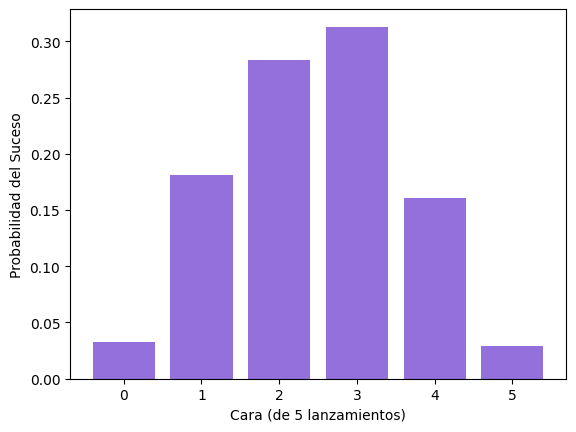

In [19]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Cara (de 5 lanzamientos)')
_ = plt.ylabel('Probabilidad del Suceso')

Supongamos que ahora queremos comprobar si una moneda es justa o no. La lanzamos cinco veces y las cinco veces sale cara. ¿Significa esto que no es una moneda justa? La estadística nos proporciona herramientas para utilizar la distribución de probabilidad anterior para responder a esta pregunta con un determinado grado de confianza.

**Volver a las slides aquí.**

### Valor esperado

In [20]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

De las slides:
$$ \mathbb{E} = \sum_x xP(x) $$

In [21]:
E = sum([x*P[x] for x in range(6)])
E

2.5

**Ejercicios**:

1. Suponiendo que cara = 1 y cruz = 0, ¿cuál es el valor esperado del lanzamiento de una moneda?
2. ...y de dos lanzamientos de una moneda justa?
3. Eres una de las mil personas que compran un billete de lotería. El billete cuesta 10\$ y da 5.000\$ si te toca. ¿Qué valor puedes esperar de esta transacción?


**Alerta de spoiler**: Soluciones a continuación

**Soluciones**:

1. (½)0 + (½)1 = 0 + ½ = ½
2. (¼)0 + (½)1 + (¼)2 = 0 + ½ + ½ = 1
3.
(1/1000)(\$5000-\$10) + (999/1000)(-\$10) \
= (1/1000)(\$4990) + (999/1000)(-\$10) \
= \$4.99 + (\$-9.99) \
= -\$5


### Medidas de Tendencia Central

Las medidas de tendencia central proporcionan una estadística resumida sobre el centro de una distribución dada.

Dada esa definición, el tema tratado más recientemente (valor esperado) debería reconocerse como una medida de tendencia central. De hecho, existen muchas medidas de tendencia central (véase [aquí](https://en.wikipedia.org/wiki/Central_tendency)); la media, la mediana y la moda son las más comunes y las detallaremos en esta sección.

#### Media

La medida de tendencia central más común de todas (hasta el punto de que es sinónima del uso del término «promedio») es la **media**, a menudo simbolizada con $\mu$ (población) o $\bar{x}$ (muestra):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

El valor esperado es, de hecho, la *media* a largo plazo de alguna función (es decir, $\mu = \mathbb{E}$). Calculemos lo cerca que está la media muestral, $\bar{x}$, de nuestros experimentos con cinco monedas del valor esperado, $\mathbb{E} = 2,5$.

In [22]:
len(heads_count)

1000

In [23]:
heads_count[0:20]

array([2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2, 1, 4])

In [24]:
sum(heads_count)/len(heads_count)

2.475

Como era de esperar, NumPy viene con una función incorporada:

In [25]:
np.mean(heads_count)

2.475

In [26]:
heads_count.mean() # fun!

2.475

Bastante cerca. La ley de los grandes números implica que a medida que aumentamos el número de experimentos (por ejemplo, a un millón - usted es bienvenido a intentarlo), vamos a converger en $\mathbb{E}=2.5$.

#### Mediana

La segunda medida de tendencia central más común es la **mediana**, el valor del punto medio de la distribución:

In [27]:
heads_count.sort()

In [28]:
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [30]:
len(heads_count)

1000

Con un número impar de valores en una distribución, consideramos que el único punto medio es la mediana, por ejemplo, el punto medio de la matriz ordenada `[2, 4, 6, 9, 10]` es seis.

Con un número par, tomamos la media de los dos valores que se encuentran en el punto medio:

In [31]:
heads_count[499]

3

In [32]:
heads_count[500]

3

...que en este caso son obviamente tres:

In [33]:
(3+3)/2

3.0

Método nativo de numpy

In [34]:
np.median(heads_count)

3.0

#### Moda

La **moda** es la última medida común de tendencia central. Es simplemente el valor de la distribución que aparece con más frecuencia.

Como se ve claramente en el último gráfico, en el caso de nuestro experimento de las cinco monedas, la moda es tres.

Método disponible en el módulo `stats` de SciPy:

In [35]:
st.mode(heads_count)

ModeResult(mode=3, count=313)

In [36]:
st.mode(heads_count)[0]

3

Con muestras pequeñas, la media suele ser la medida más precisa de la tendencia central.

Con muestras de mayor tamaño, la media, la mediana y la moda tenderán a coincidir, siempre que la distribución no sea asimétrica:

In [37]:
x = st.skewnorm.rvs(0, size=1000) # primer argumento es "skewness"; 0 no tiene sesgo

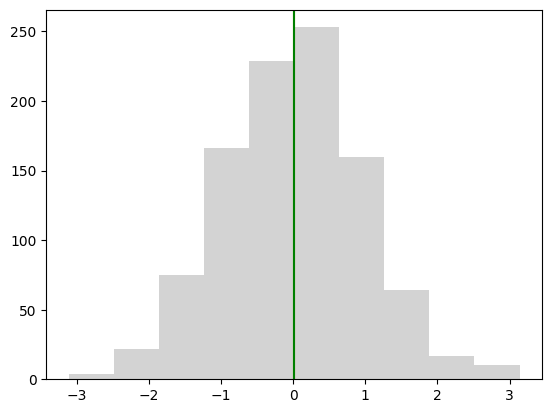

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Nota: La moda sólo se aplica a los PMF; se trata de un PDF

Por el contrario, las distribuciones sesgadas alejan la media del centro y la acercan a la cola:

In [39]:
x = st.skewnorm.rvs(10, size=1000)

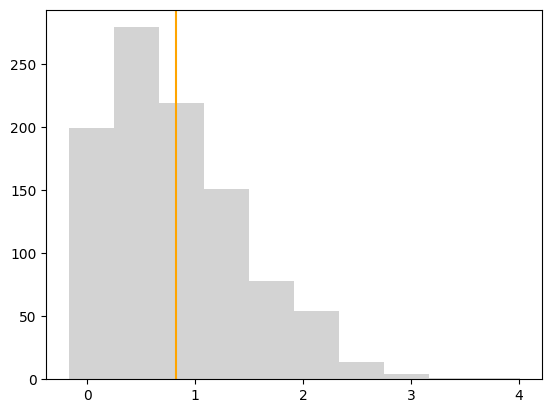

In [40]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

La moda se ve menos afectada por la asimetría, pero sólo es aplicable a distribuciones discretas. Para distribuciones continuas con asimetría (por ejemplo, datos salariales), la mediana suele ser la medida de tendencia central elegida:

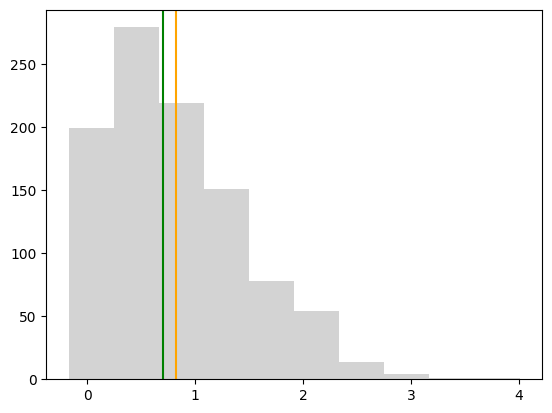

In [41]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Cuantiles

La mediana, que divide una distribución en dos en su punto medio, es el ejemplo más conocido de cuantil:

In [42]:
np.median(x)

0.6987365121323832

In [43]:
np.quantile(x, 0.5)

0.6987365121323832

En general, los cuantiles dividen las distribuciones y los más comunes son:

* Percentiles,
* Cuartiles y
* Deciles.

**Los percentiles** dividen la distribución en cualquier punto sobre cien («pour cent» significa «sobre cien» en francés). Por ejemplo, si quisiéramos identificar el umbral del 5% superior de una distribución, lo cortaríamos en el percentil 95. O, para el 1% superior, lo cortaríamos en el percentil 99.

In [44]:
p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

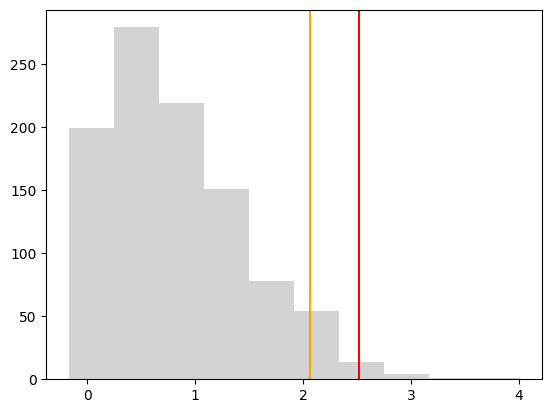

In [45]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Ten en cuenta que el método Numpy `quantile()` es idéntico al método `percentile()` excepto que pasamos proporciones (que van de cero a uno) en el primero y porcentajes (que van de cero a 100) en el segundo:

In [46]:
np.quantile(x, [.95, .99])

array([2.06249928, 2.51830108])

Los **cuartiles**, como su nombre indica, son cuantiles que dividen una distribución en trimestres partiendo la distribución en el percentil 25, la mediana (también conocida como percentil 50) y el percentil 75:

In [47]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

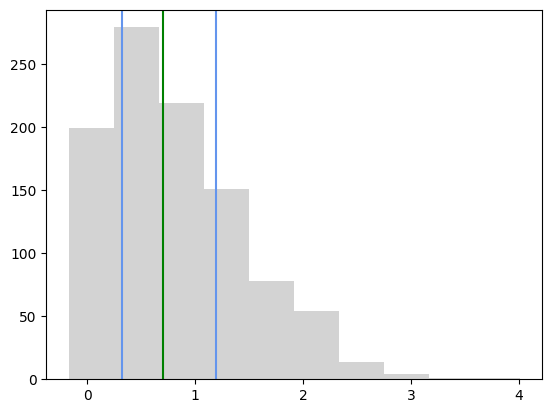

In [48]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

Por último, los **deciles** (del latín *decimus*, que significa «décimo») dividen una distribución en diez segmentos de tamaño uniforme:

In [49]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [50]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

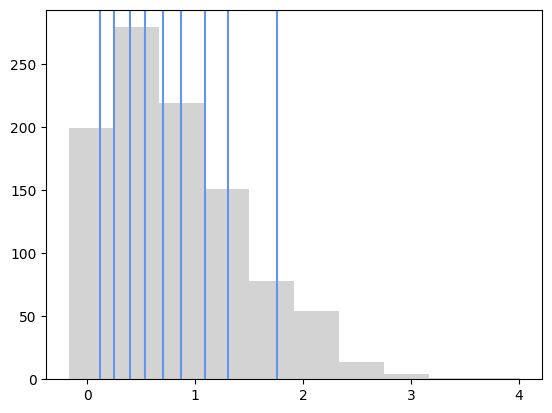

In [51]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

A modo de ejemplo, podemos referirnos al 10% inferior como el decil inferior o el primer decil, mientras que el 10% superior es el decil superior o el décimo decil.

### El Diagrama de Caja y Bigotes

In [52]:
sns.set(style='whitegrid')

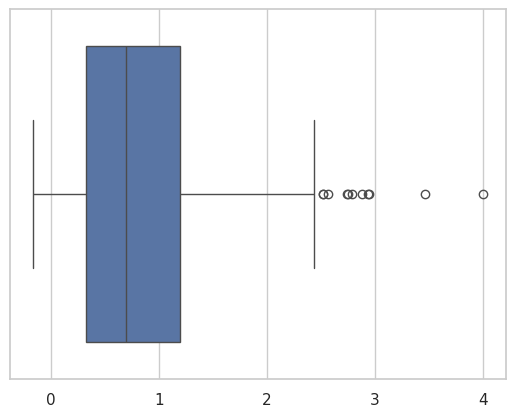

In [53]:
_ = sns.boxplot(x=x)

Los bordes de las cajas y la mediana se determinan por cuartiles:

In [54]:
q

array([0.32494046, 0.69873651, 1.19431522])

Los bordes de las cajas definen el **rango inter-cuartílico** (IQR):

In [55]:
r = 1.194 - 0.325
r

0.869

Las longitudes de los bigotes se determinan por los puntos de datos más alejados a menos de $1,5 \text{IQR}$ de los bordes de la caja.

En este caso, el bigote inferior podría extenderse tanto hacia abajo (hacia la izquierda en el gráfico) como:

In [56]:
0.325 - 1.5*r

-0.9785000000000001

El valor más bajo se encuentra dentro de ese intervalo, por lo que el bigote se traza donde se encuentra el valor más bajo:

In [57]:
np.min(x)

-0.17083838831568182

El bigote superior podría estirarse tanto hacia arriba (hacia la derecha en el gráfico) como:

In [58]:
1.194 + 1.5*r

2.4975

Hay varios (once) valores por encima de este umbral en la distribución. Estos valores se consideran «valores atípicos» y se representan como puntos individuales:

In [59]:
x.sort()

In [60]:
x[-15:]

array([2.39810074, 2.40295599, 2.41430044, 2.43541111, 2.51827951,
       2.52043572, 2.56177972, 2.74024547, 2.74882884, 2.78877435,
       2.88399304, 2.93368541, 2.94293176, 3.46465001, 4.00641863])

El duodécimo valor más alto, 2,435, es el mayor dentro del alcance máximo del bigote superior, por lo que éste se traza allí.

Los gráficos de caja y bigotes son útiles para examinar las distribuciones por sí solas, pero resultan especialmente útiles para comparar distribuciones:

In [61]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


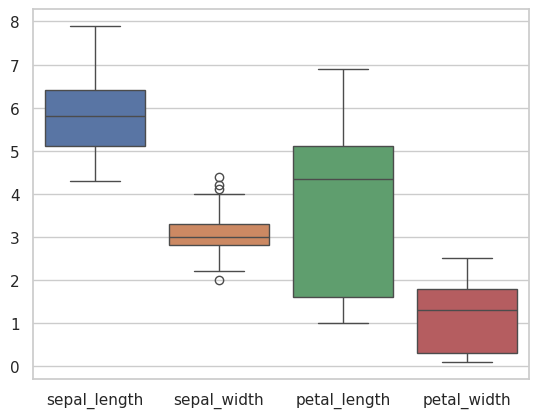

In [62]:
_ = sns.boxplot(data=iris)

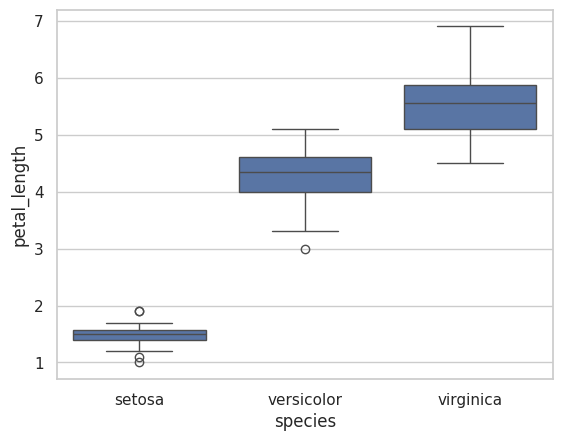

In [63]:
_ = sns.boxplot(x = 'species', y = 'petal_length', data = iris)

In [64]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


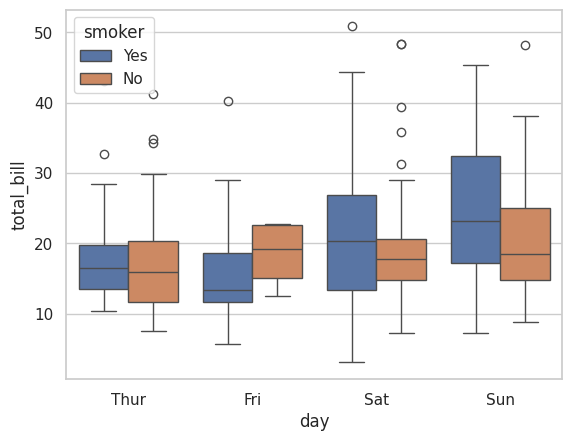

In [65]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

### Medidas de Dispersión

La IQR es una medida relativamente poco frecuente de la dispersión de los valores en torno al centro de una distribución. Las más utilizadas son:

* Varianza,
* Desviación estándar y
* Error estándar.

#### Varianza

**La varianza** (denotada con $\sigma^2$) puede escribirse utilizando la notación del valor esperado, pero es más fácil de entender sin ella:
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

(El astuto seguidor de la serie *Fundamentos del Aprendizaje Automático* puede notar que esta fórmula es la misma que el costo del error cuadrático medio, excepto que $x_i$ se está comparando con la media $\mu$ en lugar de un valor predicho $\hat{x}_i$).

(Técnicamente hablando, deberíamos dividir por $n$-1 con una muestra de datos, pero con los grandes conjuntos de datos típicos del aprendizaje automático, es una diferencia insignificante. Si $n$ fuera igual a un número pequeño como 8, entonces sí importaría).

(También técnicamente hablando, la varianza de una muestra se denota típicamente con $s^2$ en contraposición al griego $\sigma^2$, de forma similar a como $\bar{x}$ denota la media de una muestra mientras que el griego $\mu$ se reserva para la media poblacional).

Como ejemplo, calculemos la varianza de la PDF `x` de antes:

In [66]:
xbar = np.mean(x)
xbar

0.8219573880882259

In [67]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [68]:
squared_differences[0:10]

[0.9856434536454379,
 0.9170226052916489,
 0.8965181282231266,
 0.8883307031718269,
 0.8733501430824243,
 0.8562478309191935,
 0.8319771034452769,
 0.8310929040089835,
 0.7863402041234238,
 0.7766155393407362]

In [69]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.39813585982250543

Por supuesto, hay un método NumPy incorporado:

In [70]:
np.var(x)

0.3981358598225057

#### Desviación Estándar

Un derivado directo de la varianza es la **desviación estándar** (denotada con $\sigma$), que es conveniente porque sus unidades están en la misma escala que los valores de la distribución:

$$ \sigma = \sqrt{\sigma^2} $$

In [71]:
sigma = sigma_squared**(1/2)
sigma

0.6309800787841923

In [72]:
np.std(x)

0.6309800787841925

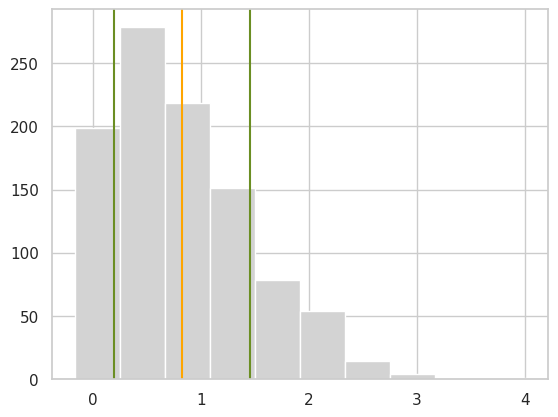

In [73]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Error Estándar

Otra derivación de la desviación típica es el **error típico**, que se denota con $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [74]:
sigma/(len(x))**(1/2)

0.019953342071505353

In [75]:
st.sem(x) # por defecto a 1 grado de libertad (n-1), que puede ignorarse con los conjuntos de datos más grandes de ML

0.01996332623128527

In [76]:
st.sem(x, ddof=0) # 0 grados de libertad (n)

0.01995334207150536

El error estándar nos permite comparar si las medias de dos distribuciones difieren *significativamente*, un punto central de *Introducción a la Estadística*.

### Medidas de parentesco

Si tenemos dos vectores de la misma longitud, $x$ e $y$, en los que cada elemento de $x$ está emparejado con el elemento correspondiente de $y$, la **covarianza** proporciona una medida de lo relacionadas que están las variables entre sí:

$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [77]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [78]:
x = iris.sepal_length
y = iris.petal_length

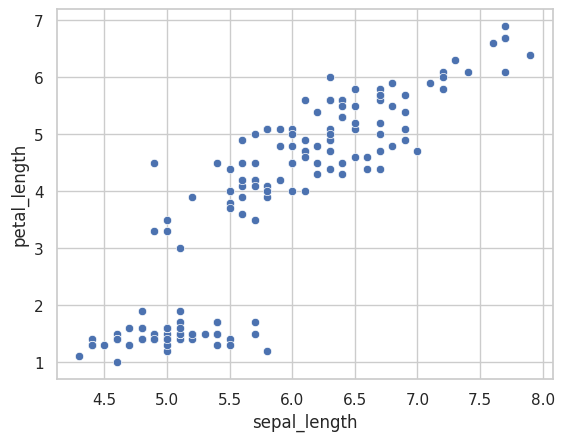

In [79]:
_ = sns.scatterplot(x=x, y=y)

In [80]:
n = len(x)

In [81]:
xbar = sum(x)/n
ybar = sum(y)/n

In [82]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [83]:
cov = sum(product)/n
cov

1.2658199999999995

El método NumPy `cov()` devuelve una **matriz de covarianza**, que es una matriz de $2 \times 2$ porque $x$ e $y$ juntas describen un espacio bidimensional:

In [84]:
np.cov(x, y, ddof=0) # de nuevo, por defecto ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

Los elementos diagonales de la matriz de covarianzas representan la varianza de $x$ e $y$, respectivamente:

In [85]:
np.var(x)

0.6811222222222222

In [86]:
np.var(y)

3.0955026666666674

Si $x$ e $y$ están inversamente relacionados, su covarianza es negativa. Cuanto menos relacionadas estén, más se acercará su covarianza a cero:

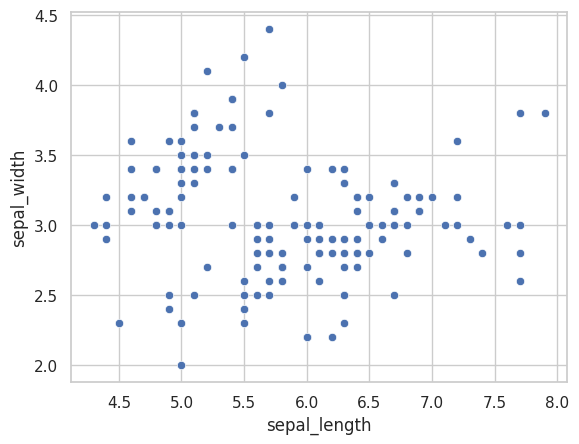

In [87]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [88]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

#### Correlación

Uno de los inconvenientes de la covarianza es que confunde la escala relativa de dos variables con una medida de la relación entre ellas. **La correlación** se basa en la covarianza y supera este inconveniente mediante el cambio de escala, con lo que mide exclusivamente el parentesco. La correlación es mucho más común debido a esta diferencia.

El coeficiente de correlación (desarrollado por Karl Pearson en el siglo XX, aunque ya era conocido en el siglo XIX) se designa a menudo con $r$ o $\rho$ y se define por:

$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [89]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [90]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

In [91]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [92]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

El segundo valor de salida de `pearsonr` es una medida de significación estadística, que detallaremos en *Introducción a las estadísticas*.

$\rho$ tiene un rango de -1 a 1, con valores más cercanos a cero que indican una menor correlación:

In [93]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300206

Cuanto más se acerque $\rho$ a 1 ó -1, más fuerte será la correlación positiva o negativa, respectivamente:

In [94]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865831

Nota: La covarianza y la correlación sólo tienen en cuenta las relaciones lineales. Dos variables pueden estar relacionadas entre sí de forma no lineal y estas métricas pueden dar cero.

**Volver a las slides aquí.**

## Segmento 2: Distribuciones en Machine Learning

### Uniforme

La distribución uniforme es muy sencilla. Tiene probabilidades constantes en toda la gama de valores de su dominio:

In [95]:
u = np.random.uniform(size=10000)

In [96]:
sns.set_style('ticks')

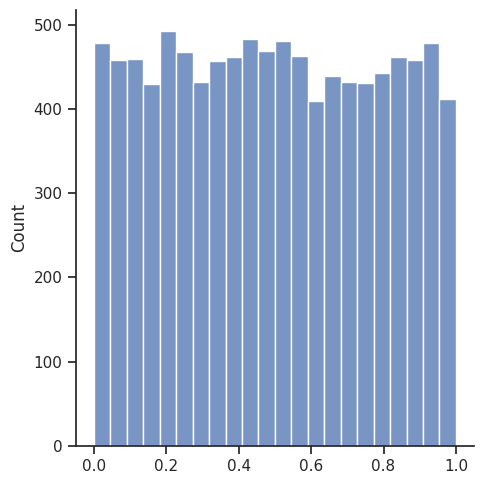

In [97]:
_ = sns.displot(u)

Algunos ejemplos reales son:

* Tirar dados (PMF)
* Tirar cartas (PMF)
* Modelo de hiperparámetros
* Emisión de partículas radiactivas
* Demanda económica
* Errores de cuantificación de señales analógicas-digitales

### Gaussiana

Carl Friedrich Gauss (matemático y científico alemán de principios del siglo XIX) da nombre a más de cien conceptos de matemáticas, física y astronomía. Uno de esos conceptos es la distribución de Gauss, también conocida como «curva de campana» (aunque varias distribuciones tienen forma de campana) o **distribución normal**:

In [98]:
x = np.random.normal(size=10000)

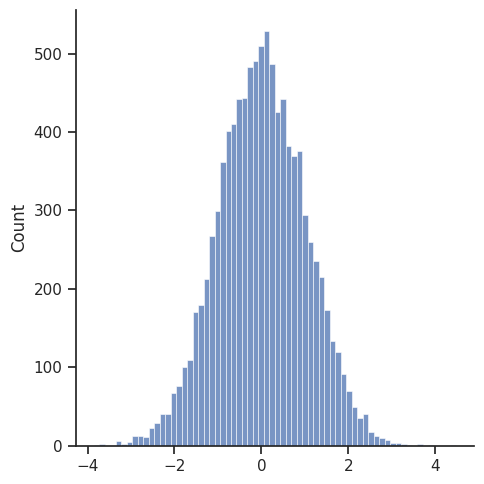

In [99]:
_ = sns.displot(x)

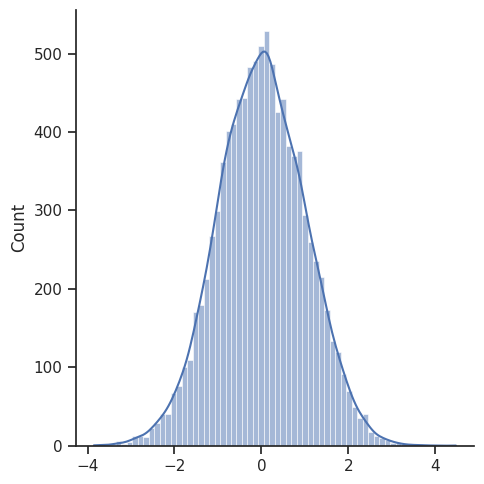

In [100]:
_ = sns.displot(x, kde=True)

Cuando la distribución normal tiene una media ($\mu$) de cero y una desviación estándar ($\sigma$) de uno, como ocurre por defecto con el método `normal()` de NumPy...

In [101]:
np.mean(x)

0.010746657894433886

In [102]:
np.std(x)

1.006376502514602

...es una **distribución normal estándar** (también conocida como distribución gaussiana estándar). Las distribuciones normales se pueden denotar con la fuente *math caligráfica* como $\mathcal{N}(\mu, \sigma^2)$, por lo que la distribución normal estándar se puede denotar como $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ en este caso porque $1^2 = 1$).

Las distribuciones normales son, con diferencia, las más comunes en estadística y aprendizaje automático. Suelen ser la opción por defecto, sobre todo si se tiene información limitada sobre el proceso aleatorio que se está modelando, porque:

1. Las distribuciones normales asumen la mayor incertidumbre posible sobre la variable aleatoria que representan (en relación con cualquier otra distribución de varianza equivalente). Los detalles de esto están fuera del alcance de este tutorial.
2. Tanto los procesos aleatorios simples como los muy complejos tienen, en todas las condiciones habituales, una distribución normal cuando muestreamos valores del proceso. Dado que muestreamos datos para modelos estadísticos y de aprendizaje automático por igual, este llamado **teorema del límite central** (que se trata a continuación) es un concepto de importancia crítica.

Los ejemplos del mundo real incluyen:

* Probabilidad de cara en *n* lanzamientos (PMF; $n = 5$ antes, $n = 100$ después)
* Suma de tiradas dado(s) (PMF)
* Altura de mujeres adultas
* Altura de los hombres adultos
* Puntuaciones en pruebas de educación, por ejemplo, SAT

In [103]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

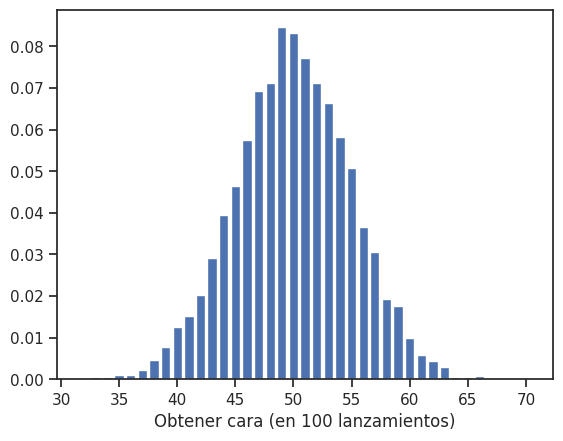

In [104]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Obtener cara (en 100 lanzamientos)')

### El Teorema Central del Límite

Para desarrollar una comprensión funcional de la TCL, vamos a muestrear algunos valores de nuestra distribución normal:

In [105]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.32659596, -0.93700698,  2.27851732,  1.21587356,  1.35370984,
       -0.4057365 ,  0.38816803, -0.55343125, -1.6885922 , -2.33595362])

La media de una muestra no siempre va a ser cercana a cero con una muestra tan pequeña:

In [106]:
np.mean(x_sample)

-0.03578558368006331

Definamos una función para generar **distribuciones muestrales** de la media de una distribución de entrada dada:

In [107]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

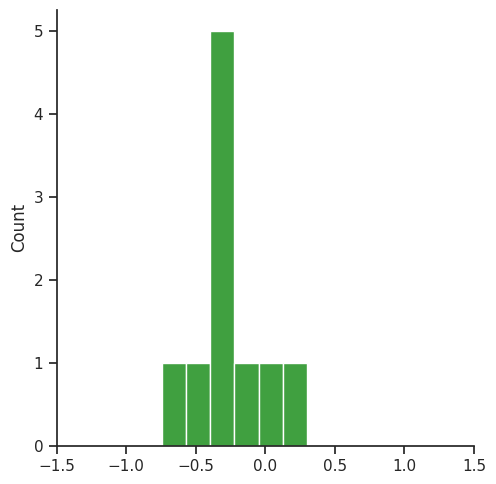

In [108]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

Cuantas más muestras tomemos, más probable será que la distribución muestral de las medias se distribuya normalmente:

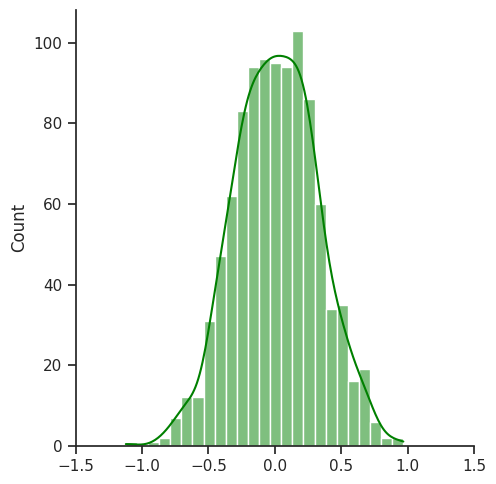

In [109]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Cuanto mayor sea la muestra, más ajustadas tenderán a ser las medias muestrales en torno a la media poblacional:

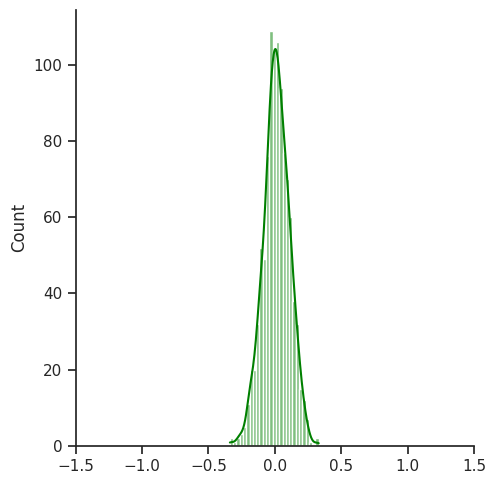

In [110]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

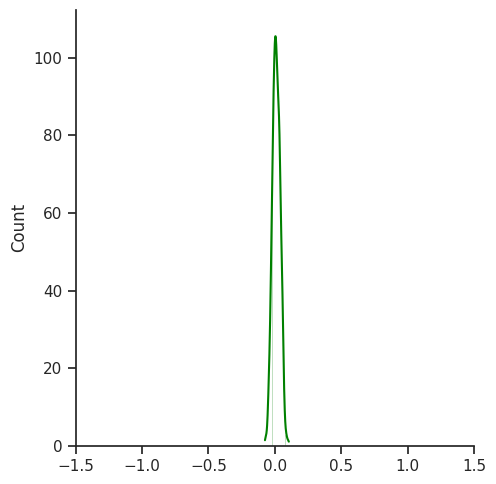

In [111]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Muestreo de una distribución sesgada

In [112]:
s = st.skewnorm.rvs(10, size=10000)

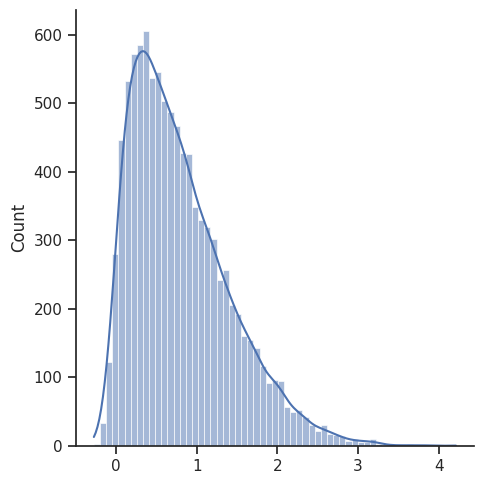

In [113]:
_ = sns.displot(s, kde=True)

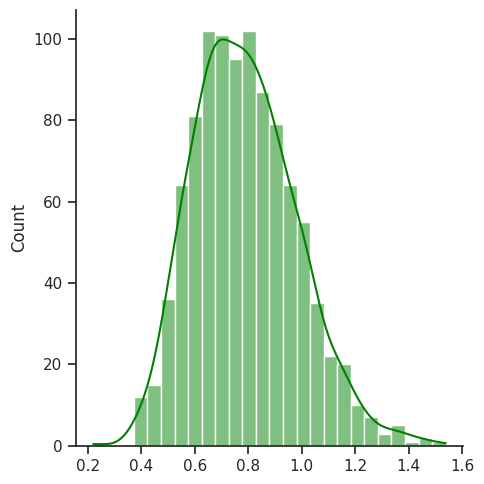

In [114]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

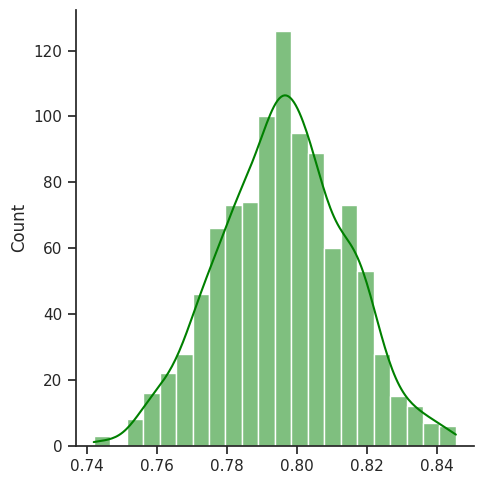

In [115]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

In [116]:
np.mean(s)

0.7956080782695314

#### Muestreo de una distribución multimodal

In [117]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

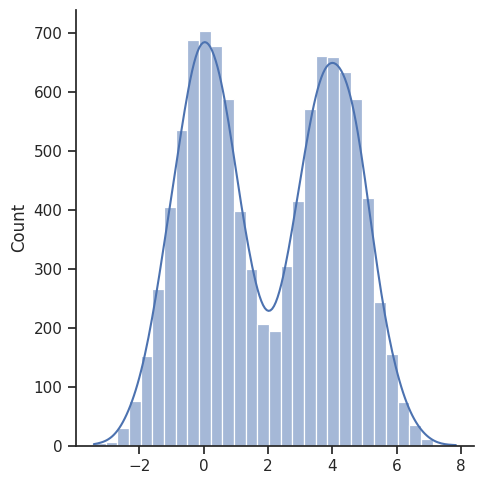

In [118]:
_ = sns.displot(m, kde=True)

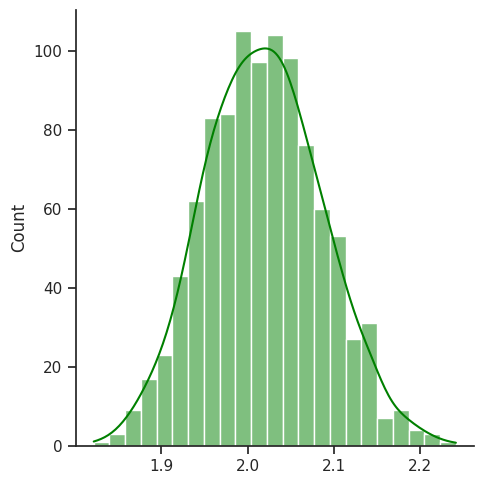

In [119]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

In [120]:
np.mean(m)

2.0200059881546943

#### Muestreo de una uniforme

Incluso tomando muestras de una distribución uniforme muy poco normal, la distribución de muestreo resulta normal:

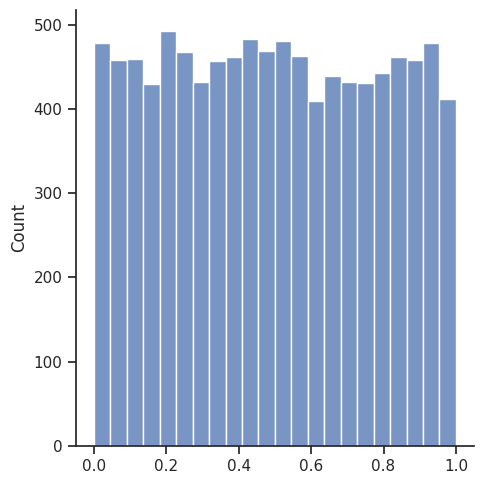

In [121]:
_ = sns.displot(u)

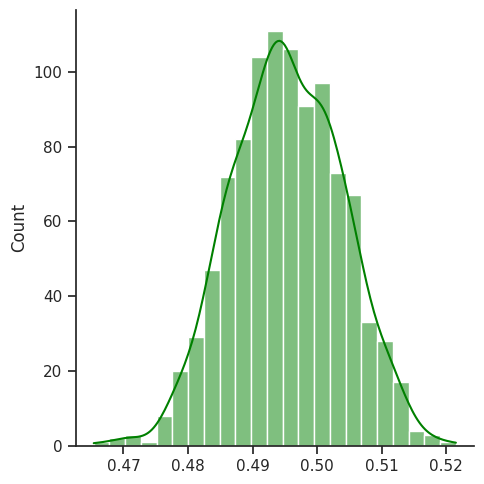

In [122]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

In [123]:
np.mean(u)

0.4955637880942606

Por lo tanto, con tamaños de muestra suficientemente grandes, podemos suponer que la distribución muestral de las medias se distribuirá normalmente, lo que nos permite aplicar modelos estadísticos y de ML configurados para ruido distribuido normalmente, que suele ser la suposición por defecto.

Como ejemplo, la «prueba *t*» (tratada en *Introducción a la Estadística*) nos permite inferir si dos muestras proceden de poblaciones diferentes (digamos, un grupo experimental que recibe un tratamiento y un grupo de control que recibe un placebo). Gracias al TCL, podemos utilizar esta prueba incluso si no tenemos ni idea de cuáles son las distribuciones subyacentes de las poblaciones sometidas a prueba, lo que puede ser el caso más frecuente.

(A pesar de estar asociada a un concepto clave como la TCL, el nombre «distribución normal» no pretendía originalmente implicar que otras distribuciones fueran «anormales». Se trata de una peculiaridad histórica relacionada con la descripción de Gauss de ecuaciones ortogonales (técnicamente, también conocidas como «normales») asociadas a usos aplicados de la distribución).

(Por último, quizá te preguntes cuál es la finalidad del muestreo. Pues bien, cuando recogemos datos del mundo real, casi siempre estamos muestreando un subconjunto de todos los datos disponibles producidos por un proceso aleatorio determinado. Y, una vez que hemos recogido una muestra de datos, el aspecto de la misma que más nos suele interesar por encima de todo es su media).

### Distribution Log-Normal

El logaritmo natural de la distribución **log-normal** se distribuye normalmente:

In [124]:
x = np.random.lognormal(size=10000) # por defecto una normal estandar con mu=0, sigma=1

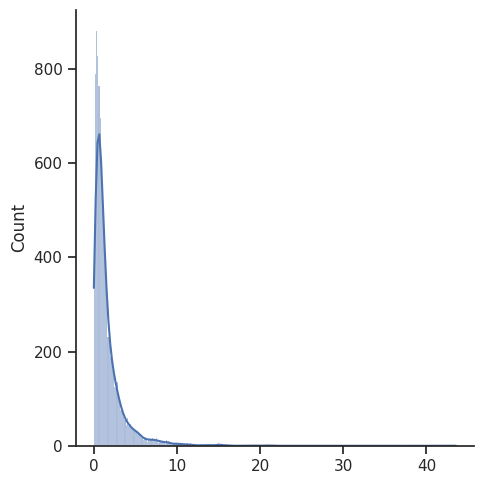

In [125]:
_ = sns.displot(x, kde=True)

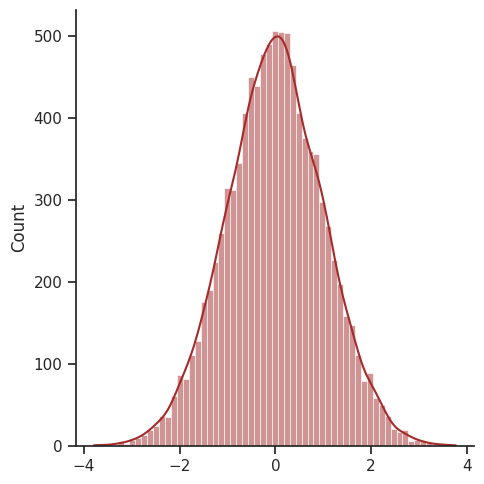

In [126]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Ejemplos del mundo real:

* Ingresos
* Duración de los comentarios en foros en línea
* Duración de partidas de ajedrez o de la resolución del cubo de Rubik
* Tamaño de archivos de vídeo de acceso público
* Número de casos hospitalizados en una epidemia con intervención pública

### Distribución Exponencial

Se aplasta relativamente contra cero y luego disminuye exponencialmente hacia valores más altos. Aunque se parece a la distribución logarítmica normal, la distribución exponencial también sólo tomar valores positivos pero solamente disminuye (la log-normal puede subir cerca del cero antes de empezar a bajar).

In [133]:
x = np.random.exponential(scale=4, size=10000) # El parámetro "scale" está por defecto en uno

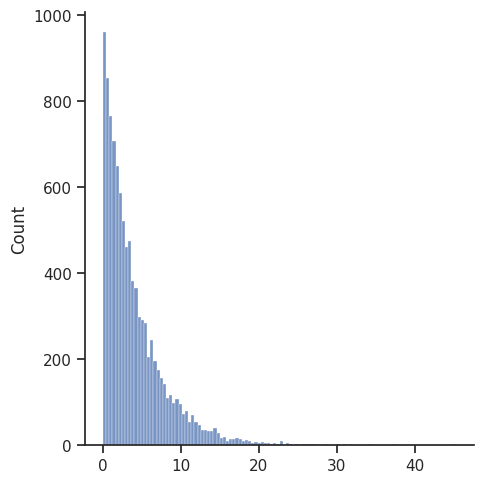

In [134]:
_ = sns.displot(x)

Su logaritmo tiene una distribución sesgada:

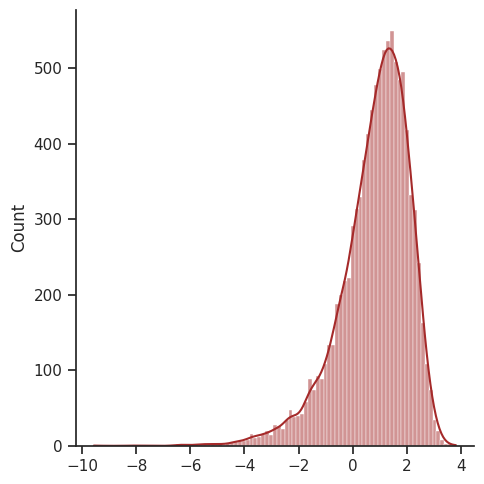

In [135]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Ejemplos del mundo real:

* Tiempo entre peticiones para acceder a páginas de Wikipedia
* Usado frecuentemente en aprendizaje profundo

### Distribución de Laplace

Debe su nombre a Pierre-Simon Laplace, a quien ya hemos mencionado (y fotografiado) como figura clave en el desarrollo de la estadística bayesiana.

In [136]:
x = np.random.laplace(size=10000)

También denominada «distribución exponencial doble»:

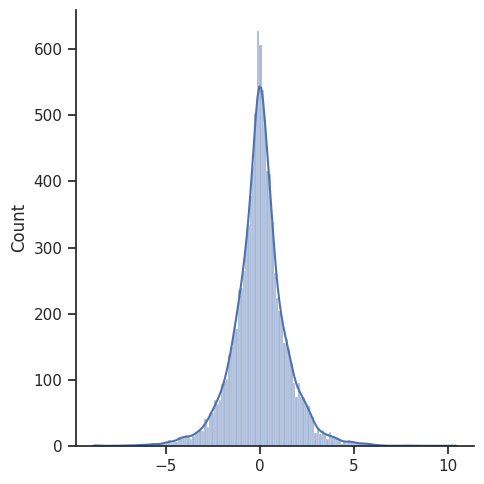

In [137]:
_ = sns.displot(x, kde=True)

Además del parámetro de escala de la función exponencial, tiene un parámetro de localización que permite centrarla en cualquier valor:

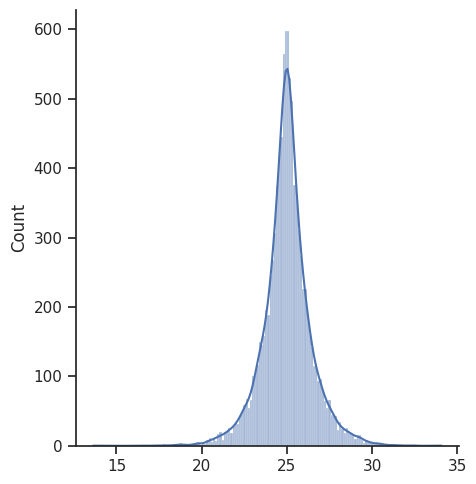

In [140]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Ejemplos del mundo real:

* Fenómenos meteorológicos extremos, por ejemplo, precipitaciones máximas en un día.
* Muchas aplicaciones de aprendizaje automático; siempre que se desee un pico agudo de probabilidad

### Distribución Binomial

Hasta ahora, todas las distribuciones han sido para variables continuas (PDF). Ésta es discreta (PMF).

Ya la hemos utilizado para lanzar monedas; se utiliza para resultados binarios (0 ó 1).

Sus parámetros son:

* *n*: número de ensayos
* *p*: probabilidad de resultado de 1
* *tamaño*: número de experimentos con *n* ensayos cada uno

In [141]:
n = 5
n_experiments = 1000

#### Moneda Regular (p = 0.5)

In [142]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

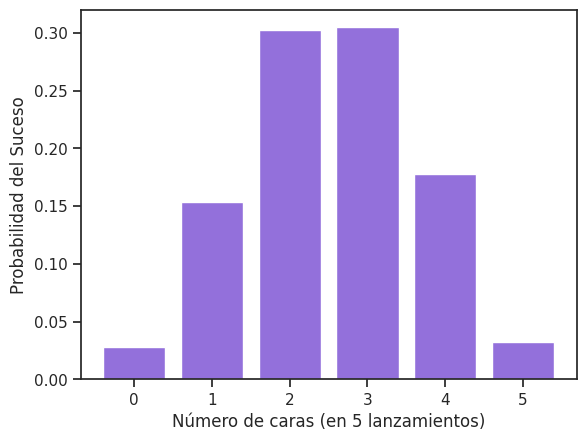

In [143]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Número de caras (en 5 lanzamientos)')
_ = plt.ylabel('Probabilidad del Suceso')

#### Moneda trucada (p = 0.8)

In [144]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

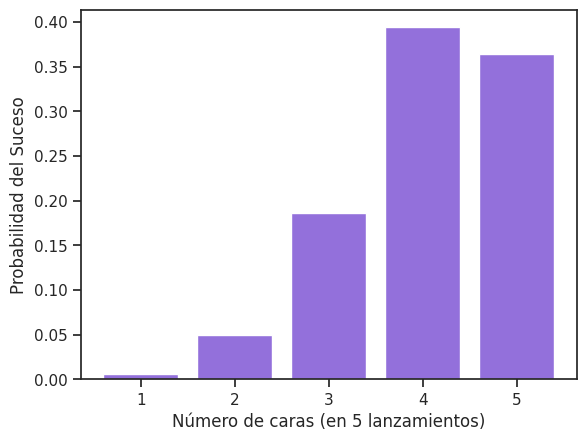

In [145]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Número de caras (en 5 lanzamientos)')
_ = plt.ylabel('Probabilidad del Suceso')

Técnicamente, las distribuciones binomiales se crean muestreando $n>1$ «ensayos Bernoulli». La distribución **Bernoulli** es equivalente a la distribución binomial cuando $n=1$:

In [153]:
np.random.binomial(1, 0.5)

1

Ejemplos del mundo real:

* Llegar a tiempo al trabajo
* Candidato invitado a una entrevista
* Epidemiología: probabilidad de morir o de contraer una enfermedad

### Distribución Multinomial

Generalización de la distribución binomial a variables aleatorias discretas con más de dos resultados posibles, por ejemplo, el lanzamiento de un dado:

In [154]:
n = 1000

In [155]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([182, 194, 164, 165, 158, 137])

In [156]:
event_proba = rolls/n

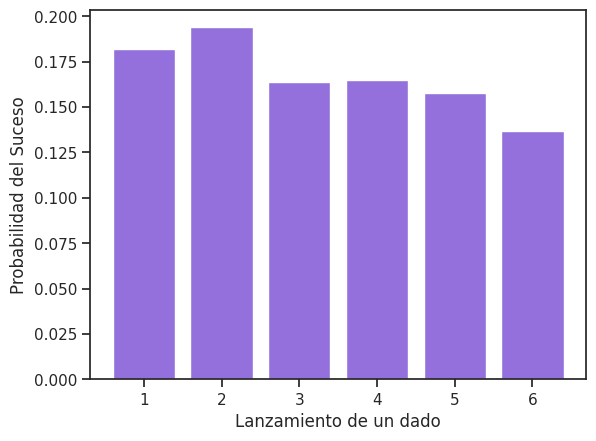

In [157]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Lanzamiento de un dado')
_ = plt.ylabel('Probabilidad del Suceso')

Como en el caso binomial, las distribuciones multinomiales se crean muestreando $n>1$ distribuciones multinoulli, donde la distribución multinoulli es equivalente a la distribución multinomial cuando $n=1$:

In [166]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 0, 1])

Dado que las distribuciones multinomiales pueden representar cualquier variable categórica (por ejemplo, hamburguesa, perrito caliente, pizza; 52 naipes; equipos de la NFL), no sólo valores enteros, no siempre podemos calcular un valor esperado.

### Distribución de Poisson

**Poisson** es una tercera distribución ampliamente utilizada para variables aleatorias discretas y es la última distribución que cubriremos.

Lleva el nombre del matemático francés Simeon Denis Poisson y se utiliza para datos de recuento, p. ej:

* Número de coches que pasan en un minuto
* Número de comensales en un restaurante por la noche
* Número de nuevas contrataciones en un mes

El primer argumento del método NumPy `poisson()` es $\lambda$, que debe ser mayor que cero y guía el pico de la distribución de probabilidad. Por ejemplo, el muestreo de Poisson con $\lambda=5$ tenderá a extraer muestras cerca de 5.

In [167]:
lam=5

El segundo argumento es el número de muestras a extraer:

In [168]:
n=1000

In [169]:
samples = np.random.poisson(lam, n)

In [170]:
samples[0:20]

array([ 1,  3,  3,  5,  7,  4,  0,  5,  7,  7,  6,  3,  6,  1,  5, 11,  7,
        4, 11,  4])

In [171]:
x, x_count = np.unique(samples, return_counts=True)

In [172]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [173]:
x_count

array([  9,  33,  66, 164, 166, 177, 153, 105,  57,  33,  18,  10,   7,
         2])

In [174]:
Px = x_count/n

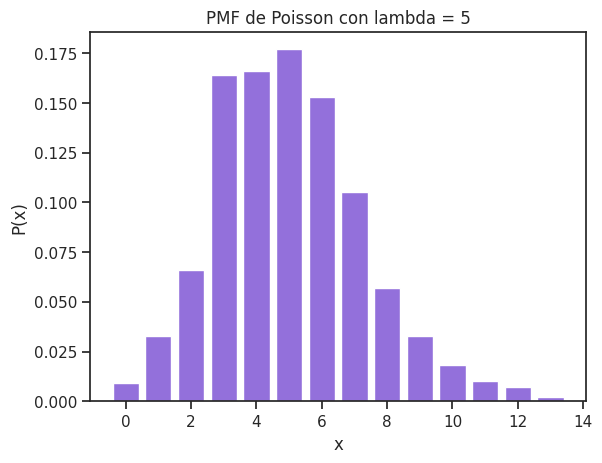

In [175]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF de Poisson con lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

### Distribuciones Mixtas

Adaptado de un post de [Stack Overflow](https://stackoverflow.com/questions/47759577/creating-a-mixture-of-probability-distributions-for-sampling):

La distribución multinomial (controlada por `np.random.choice()`) con probabilidades fijadas por la matriz `coefficients` determina de cuál de las tres distribuciones se tomará la muestra.

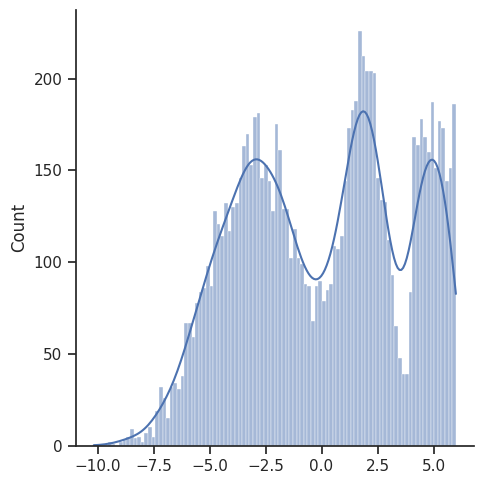

In [176]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # para en el caso de que no sumen 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

**El modelo de mezcla gaussiano** (GMM) es un tipo común de distribución de mezcla, en el que todas las distribuciones componentes son normales.

**Volver a las slides aquí.**

## Segmento 3: Teoría de la información

De las diapositivas, la fórmula de **autoinformación** es:
$$ I(x)=-\text{log}P(x) $$

In [2]:
def self_info(my_p):
    return -1*np.log(my_p)

In [3]:
self_info(1)

-0.0

In [4]:
self_info(0.1)

2.3025850929940455

In [5]:
self_info(0.01)

4.605170185988091

In [6]:
self_info(0.5)

0.6931471805599453

In [7]:
self_info(0.5) + self_info(0.5)

1.3862943611198906

Dependiendo de la base logarítmica que utilicemos, las unidades de autoinformación varían. Lo más frecuente es que las unidades sean

* **nats**:
    * Logaritmo natural, como arriba con `np.log()`.
    * Típico en ML
* **bits**:
    * Logaritmo de base 2
    * También conocido como **shannons**.
    * Típico en informática

Así, la autoinformación de $P(x) = 0,1$ es ~2,3 nats.

### Shannon y la entropía diferencial

Para cuantificar la incertidumbre sobre una distribución de probabilidad (a diferencia de un único suceso), podemos utilizar la **entropía de Shannon**, que se denota $H(x)$ o $H(P)$:

$$ H(x) = \mathbb{E}_\text{x}\sim P[I(x)] = \mathbb{E}_\text{x}\sim -P[\text{log}P(x)] $$

Expresa el contenido informativo esperado asociado a un suceso extraído de la distribución:
* **Baja entropía**:
    * La distribución es ~determinista y los resultados ~ciertos.
    * Por ejemplo, una moneda ponderada siempre sale cara ($P(1)=1$)
* **Entropía alta**:
    * Los resultados son inciertos
    * La distribución uniforme puede ser la de mayor entropía.
    * Por ejemplo, la moneda tiene la misma probabilidad de salir cara que cruz ($P(0)=P(1)=0,5$).

Como ejemplo, la entropía de Shannon para una variable aleatoria binaria (por ejemplo, lanzar una moneda) es:
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [8]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

Lanzará `nan` con $p=0$ (siempre cruz) o $p=1$ (siempre cara), pero podemos acercarnos:

In [12]:
binary_entropy(0.00001)

0.00012512920464949012

In [13]:
binary_entropy(0.99999)

0.00012512920464901166

In [14]:
binary_entropy(0.9)

0.3250829733914482

In [15]:
binary_entropy(0.5)

0.6931471805599453

In [16]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points

In [17]:
H = binary_entropy(p)

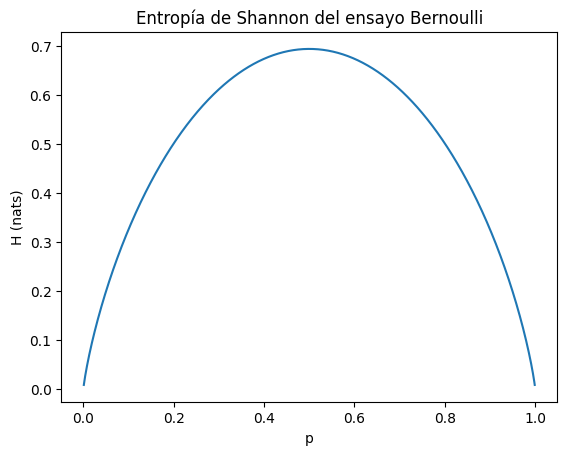

In [18]:
fig, ax = plt.subplots()
plt.title('Entropía de Shannon del ensayo Bernoulli')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)

**Entropía diferencial**: simplemente el término para la entropía de Shannon si la distribución es PDF

### Divergencia de Kullback-Leibler

**La divergencia KL** nos permite cuantificar la entropía relativa de Shannon (o diferencial) de dos distribuciones de probabilidad que están sobre la misma variable aleatoria x.

Por ejemplo, si tenemos una distribución de probabilidad descrita por $P(x)$ y otra por $Q(x)$, su divergencia KL (denotada $D_\text{KL}$) es:
$$ D_\text{KL}(P||Q) = \mathbb{E}_\text{x} \sim P[\text{log}P(x) - \text{log}Q(x)] = \mathbb{E}_\text{x} \sim P[\text{log} \frac{P(x)}{Q(x)}]  $$

### Entropía Cruzada

La entropía cruzada es un concepto derivado de la divergencia KL. Su detalle está más allá del alcance de esta serie, excepto para mencionar que nos proporciona la función de coste **entropía cruzada**.

Esta función de coste es omnipresente en las redes neuronales, ya que es la función de coste elegida para predecir resultados discretos y categóricos. Por ejemplo, para un clasificador binario, el coste de entropía cruzada ($C$) es:

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

In [19]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [20]:
cross_entropy(1, 0.9997)

0.00030004500900199243

In [21]:
cross_entropy(1, 0.9)

0.10536051565782628

In [22]:
cross_entropy(1, 0.6)

0.5108256237659907

In [23]:
cross_entropy(1, 0.3)

1.2039728043259361